   # Projeto 2 - Ciência do Dados
___

   ## Arthur Pansini; Enzo Fonteyne; André Faia.

   Nosso projeto é focado na industria automobilistica, na qual utilizamos das variaveis ano de fabricação, modelo, tipo de câmbio e quilometros rodados para analizar quais dessas caracteristicas estão mais presentes em carros vendidos acima dos 20 mil dolares. Buscamos trazer uma base de dados ampla e com enorme diversidade de informações acerca do tema, para que se aproxime o maximo possível da realidade!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Para ter melhor print
from IPython.display import display

# Pergunta principal:
A principal pergunta que desejamos reA principal pergunta que desejamos responder é: "Quais as principais características de carro de alto valor de mercado (acima de 20 mil)?"
Para a realização do projeto utilizamos uma base de dados que apresentava as informações mais significativas em diversos modelos de carros, como: preço, fabricante, modelo, ano de produção, categoria do veículo, existência de couro no interior, tipo de combustível, volume do motor, quilometragem percorrida, cilindros, tipo de cambio, rodas de tração, portas, roda e cor do veículo.

In [2]:
data = pd.read_csv("carros.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Limpeza da base de dados:
Retiramos algumas colunas que não consideramos relevantes para a realização do projeto.

In [3]:
filtro = data.loc[:,["Price", "Prod. year", "Category", "Manufacturer",  "Model","Gear box type", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags']]

In [4]:
filtro

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
0,13328,2010,Jeep,LEXUS,RX 450,Automatic,186005 km,6.0,3.5,12
1,16621,2011,Jeep,CHEVROLET,Equinox,Tiptronic,192000 km,6.0,3,8
2,8467,2006,Hatchback,HONDA,FIT,Variator,200000 km,4.0,1.3,2
3,3607,2011,Jeep,FORD,Escape,Automatic,168966 km,4.0,2.5,0
4,11726,2014,Hatchback,HONDA,FIT,Automatic,91901 km,4.0,1.3,4
...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,Coupe,MERCEDES-BENZ,CLK 200,Manual,300000 km,4.0,2.0 Turbo,5
19233,15681,2011,Sedan,HYUNDAI,Sonata,Tiptronic,161600 km,4.0,2.4,8
19234,26108,2010,Jeep,HYUNDAI,Tucson,Automatic,116365 km,4.0,2,4
19235,5331,2007,Jeep,CHEVROLET,Captiva,Automatic,51258 km,4.0,2,4


In [5]:
filtro.isnull().sum()

Price            0
Prod. year       0
Category         0
Manufacturer     0
Model            0
Gear box type    0
Mileage          0
Cylinders        0
Engine volume    0
Airbags          0
dtype: int64

In [6]:
filtro.tail(10)

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
19227,29793,2014,Sedan,MERCEDES-BENZ,E 350,Automatic,219030 km,6.0,3.5,12
19228,706,2008,Sedan,MERCEDES-BENZ,E 350,Automatic,122874 km,6.0,3.5,12
19229,50,2008,Hatchback,TOYOTA,Prius,Automatic,150000 km,4.0,1.5,6
19230,470,2011,Hatchback,TOYOTA,Prius,Automatic,307325 km,4.0,1.8,12
19231,5802,2013,Sedan,MERCEDES-BENZ,E 350,Automatic,107800 km,6.0,3.5,12
19232,8467,1999,Coupe,MERCEDES-BENZ,CLK 200,Manual,300000 km,4.0,2.0 Turbo,5
19233,15681,2011,Sedan,HYUNDAI,Sonata,Tiptronic,161600 km,4.0,2.4,8
19234,26108,2010,Jeep,HYUNDAI,Tucson,Automatic,116365 km,4.0,2,4
19235,5331,2007,Jeep,CHEVROLET,Captiva,Automatic,51258 km,4.0,2,4
19236,470,2012,Sedan,HYUNDAI,Sonata,Automatic,186923 km,4.0,2.4,12


# Análise inicial:
Filtramos nossos dados em uma faixa de valor específica;

In [7]:
data1 = (filtro.loc[filtro['Price']>=20000])
data1 = (data1.loc[filtro['Price']<=80000])
data1 = (data1.loc[filtro['Prod. year']>=1990])

In [8]:
data1.describe()

,Price,Prod. year,Cylinders,Airbags
count,5457.000000,5457.000000,5457.000000,5457.000000
mean,34150.135972,2013.554517,4.631666,6.552685
std,12928.859017,3.213620,1.287178,3.912887
min,20000.000000,1993.000000,1.000000,0.000000
25%,23521.000000,2012.000000,4.000000,4.000000
50%,30107.000000,2014.000000,4.000000,4.000000
75%,41710.000000,2016.000000,4.000000,10.000000
max,80000.000000,2020.000000,16.000000,16.000000


In [9]:
data1.isnull().sum()

Price            0
Prod. year       0
Category         0
Manufacturer     0
Model            0
Gear box type    0
Mileage          0
Cylinders        0
Engine volume    0
Airbags          0
dtype: int64

In [10]:
data1['Mileage'] = data['Mileage'].map(lambda x: x.lstrip('+-').rstrip(' km'))
data1['Mileage'] = data1['Mileage'].astype('int64')

In [11]:
# import required modules
import pandas as pd
import numpy as np
 
# create dataset
df = pd.DataFrame({'Gear box type': ['Automatic', 'Manual', 'Tiptronic', 'Variator'],
                   })
 
# display dataset
print(df)
 
# create dymmy variables
pd.get_dummies(df)

  Gear box type
0     Automatic
1        Manual
2     Tiptronic
3      Variator


,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [12]:
data1['Gear box type'] = df

In [13]:
data1.Cylinders.describe()

count    5457.000000
mean        4.631666
std         1.287178
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max        16.000000
Name: Cylinders, dtype: float64

In [14]:
data1['Engine volume'] = data1['Engine volume'].map(lambda x: x.lstrip('+-').rstrip(' Turbo'))
data1['Engine volume'] = data1['Engine volume'].astype('float64')

In [15]:
data1['Prod. year'].describe()

count    5457.000000
mean     2013.554517
std         3.213620
min      1993.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: Prod. year, dtype: float64

In [16]:
data1.tail(10)

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
19198,28225,2015,Jeep,TOYOTA,RAV 4,NaN,149019,4.0,2.5,0
19200,36065,2013,Sedan,MERCEDES-BENZ,CLA 250 AMG,NaN,68000,4.0,2.0,12
19206,22075,2012,Universal,TOYOTA,Aqua,NaN,52456,4.0,1.5,4
19207,22197,2012,Hatchback,TOYOTA,Aqua,NaN,50000,4.0,1.5,4
19208,34811,2013,Jeep,TOYOTA,RAV 4,NaN,121400,4.0,2.5,6
19211,50037,2016,Jeep,HYUNDAI,Santa FE,NaN,121902,4.0,2.0,4
19216,37633,2017,Jeep,TOYOTA,RAV 4,NaN,23430,4.0,2.5,12
19217,26017,2009,Sedan,LEXUS,ES 300,NaN,132700,4.0,3.5,4
19227,29793,2014,Sedan,MERCEDES-BENZ,E 350,NaN,219030,6.0,3.5,12
19234,26108,2010,Jeep,HYUNDAI,Tucson,NaN,116365,4.0,2.0,4


In [18]:
#sns.pairplot(data1)

In [19]:
data1.describe()

,Price,Prod. year,Mileage,Cylinders,Engine volume,Airbags
count,5457.000000,5457.000000,5.457000e+03,5457.000000,5457.000000,5457.000000
mean,34150.135972,2013.554517,1.113069e+05,4.631666,2.425344,6.552685
std,12928.859017,3.213620,8.358797e+04,1.287178,0.853856,3.912887
min,20000.000000,1993.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,23521.000000,2012.000000,5.795600e+04,4.000000,2.000000,4.000000
50%,30107.000000,2014.000000,1.007410e+05,4.000000,2.000000,4.000000
75%,41710.000000,2016.000000,1.497920e+05,4.000000,2.500000,10.000000
max,80000.000000,2020.000000,2.200000e+06,16.000000,6.400000,16.000000


In [20]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [21]:
X = data1[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags']]
Y = data1['Price']

In [22]:
results = regress(Y,X)
results.summary()

C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     364.8
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:43:18   Log-Likelihood:                -58618.
No. Observations:                5457   AIC:                         1.172e+05
Df Residuals:                    5451   BIC:                         1.173e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.716e+06   1.12e+05    -33.118      0.000   -3.94e+06    -3.5e+06
Prod. year     1856.3785     55.602     33.387      0.000    1747.377    1965.380
Mileage          -0.0131      0.002     -6.393      0.000      -0.017      -0.009
Cylinders       881.3794    191.764      4.596      0.000     505.445    1257.314
Engine volume  5308.5701    297.761     17.828      0.000    4724.840    5892.301
Airbags        -504.6149     39.853    -12.662      0.000    -582.742    -426.488
==============================================================================
Omnibus:                      724.183   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1138.634
Skew:                           0.931   Prob(JB):                    5.61e-248
Kurtosis:                       4.242   Cond. No.                     1.03e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = data1
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

#Função retirada do link https://www.kaggle.com/sauravvsrinku/starter-house-sales-in-king-county-8ceb15de-5

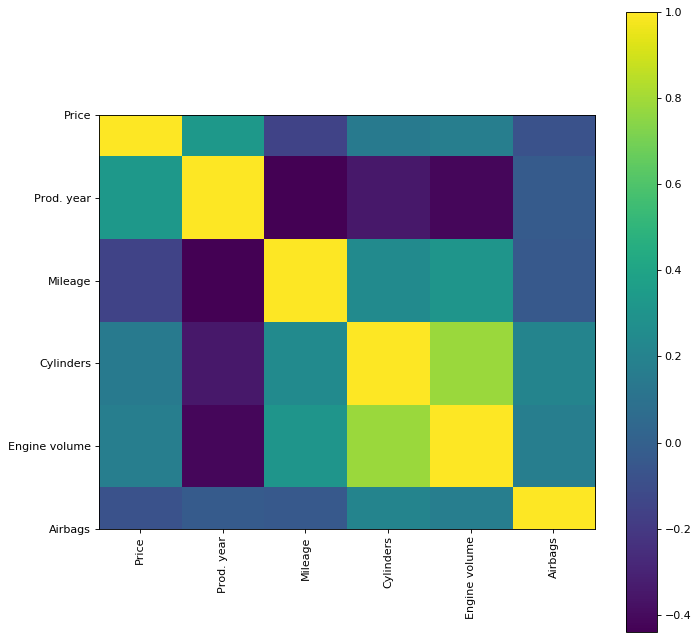

In [24]:
plotCorrelationMatrix(data1, 10)

In [25]:
# Com base na malha acima escolhemos as variaveis Prod. year e Cylinders para realizar o grafico 3D

In [26]:
X = data1[[ 'Prod. year',"Cylinders",
                    ]]
Y = data1['Price']

In [27]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     622.3
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          3.81e-244
Time:                        21:43:26   Log-Likelihood:                -58844.
No. Observations:                5457   AIC:                         1.177e+05
Df Residuals:                    5454   BIC:                         1.177e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.465e+06   1.06e+05    -32.796      0.000   -3.67e+06   -3.26e+06
Prod. year  1730.8724     52.366     33.053      0.000    1628.214    1833.531
Cylinders   3002.7529    130.740     22.967      0.000    2746.451    3259.055
==============================================================================
Omnibus:                      672.343   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.326
Skew:                           0.916   Prob(JB):                    6.64e-215
Kurtosis:                       3.991   Cond. No.                     1.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

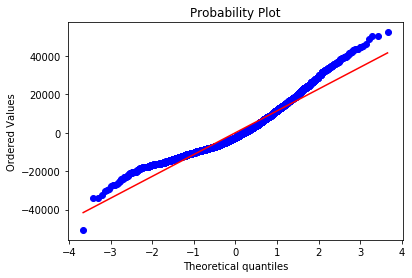

In [28]:
residuos = results.resid

plt.figure(figsize=(6,4))
probplot(residuos, dist='norm', plot=plt);

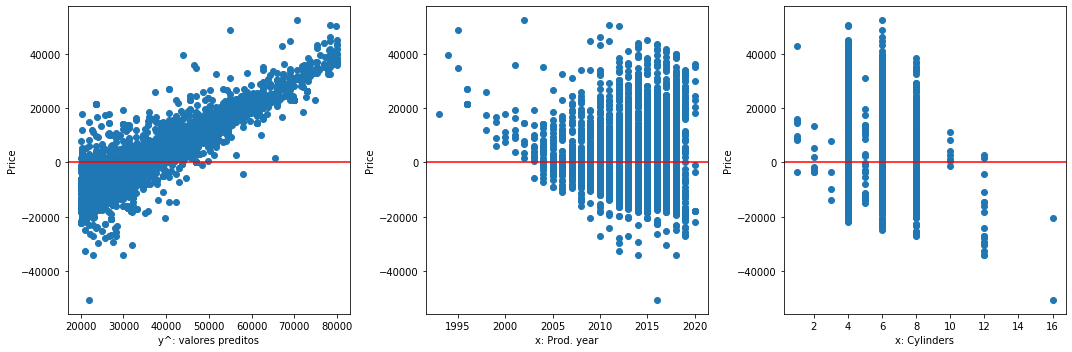

In [29]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(Y, results.resid);
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Price')
plt.xlabel('y^: valores preditos')



plt.subplot(132)
plt.scatter(X.iloc[:,0], results.resid);
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Price')
plt.xlabel(f'x: {list(X)[0]}')



plt.subplot(133)
plt.scatter(X.iloc[:,1], results.resid);
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Price')
plt.xlabel(f'x: {list(X)[1]}')



plt.tight_layout()
plt.show()

In [30]:
# Recupera os parâmetros calculados
beta0_hat = results.params[0]  # Price
beta1_hat = results.params[1]  # Prod. year
beta2_hat = results.params[2]  # cylinders

In [31]:
# Define uma função que aplica aos parâmetros
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [32]:
# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X['Prod. year']
feature2 = X['Cylinders']
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [33]:
# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [34]:
# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

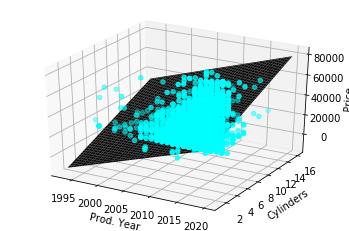

In [35]:
# Plota os pontos e o plano em 3D
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z, color='black')
plt3d.scatter(feature1, feature2, Y, color="cyan")
plt3d.set_xlabel("Prod. Year")
plt3d.set_ylabel("Cylinders")
plt3d.set_zlabel("Price")
plt.show()

In [36]:
#Uso do PlynomialFeatures
passo_inicial = PolynomialFeatures(degree=5)
 
X1 = data1.Price.to_numpy().reshape(len(data1.Price.to_numpy()), 1) 
Y1 = data1.Cylinders.to_numpy().reshape(len(data1.Cylinders.to_numpy()), 1) 

#Transformando a variável dependente
polinomial_X1 = passo_inicial.fit_transform(X1)

polinomial_X1

array([[1.00000000e+00, 3.94930000e+04, 1.55969705e+09, 6.15971156e+13,
        2.43265488e+18, 9.60728394e+22],
       [1.00000000e+00, 2.66570000e+04, 7.10595649e+08, 1.89423482e+13,
        5.04946176e+17, 1.34603502e+22],
       [1.00000000e+00, 5.94640000e+04, 3.53596730e+09, 2.10262759e+14,
        1.25030647e+19, 7.43482240e+23],
       ...,
       [1.00000000e+00, 2.60170000e+04, 6.76884289e+08, 1.76104985e+13,
        4.58172341e+17, 1.19202698e+22],
       [1.00000000e+00, 2.97930000e+04, 8.87622849e+08, 2.64449475e+13,
        7.87874322e+17, 2.34731397e+22],
       [1.00000000e+00, 2.61080000e+04, 6.81627664e+08, 1.77959351e+13,
        4.64616272e+17, 1.21302016e+22]])

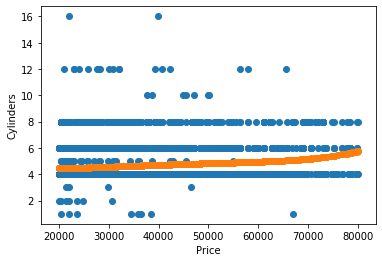

In [37]:
#Implememntando a regressão linear
modelo_inicial = LinearRegression()

#Ajuste dos dados
modelo_inicial.fit(polinomial_X1, Y1) 

#Guardando a variável
Y_pred2 = modelo_inicial.predict(polinomial_X1) 

#Plot do modelo
plt.scatter(X1, Y1)
plt.xlabel("Price")
plt.ylabel("Cylinders")
plt.scatter(X1, Y_pred2)

In [38]:
#Cálculo do root mean squared
primeiro_erro = (mean_squared_error(Y1, Y_pred2))**0.5

#Cálculo do coeficiente de determinação
media_Y1 = [Y1.mean()]*len(Y1)

r2 = 1 - (mean_squared_error(Y1, Y_pred2) / mean_squared_error(Y1, media_Y1))

xx = 0.022457*100

print("Obtivemos um RMS de Treinamento de valor: {0:.5}".format(primeiro_erro))
print("Obtivemos um R² (Coeficiente de Determinação) de Valor: {0:.5}%".format(xx))

Obtivemos um RMS de Treinamento de valor: 1.2725
Obtivemos um R² (Coeficiente de Determinação) de Valor: 2.2457%
